In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [2]:
!pip install -q timm matplotlib

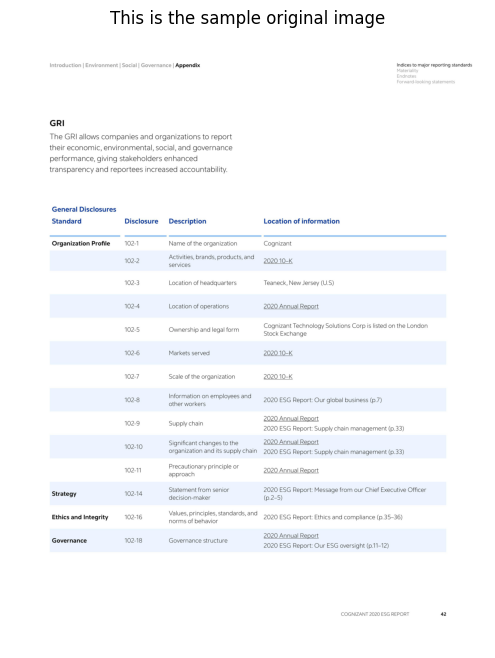

In [3]:
from huggingface_hub import hf_hub_download
from PIL import Image
import matplotlib.pyplot as plt
# Load the image
file_path = '/kaggle/input/borderless/borderless.jpg'
image = Image.open(file_path).convert("RGB")

# # Check if the image is already in a supported format, if not convert to PNG
# if image.format not in {'PNG', 'JPEG', 'JPEG2000', 'PBM', 'PGM', 'PPM', 'TIFF', 'BMP', 'GIF', 'WEBP'}:
#     print(f"Image format {image.format} is not supported, converting to PNG...")
#     image = image.convert("RGB")
#     image.save("temp_image.png")  # Save as a temporary PNG image
#     image = Image.open("temp_image.png")



# Resize the image (ensure assignment)
width, height = image.size
image = image.resize((int(width * 0.5), int(height * 0.5)))

# Make sure 'image' is in the correct format (it should be a PIL image)
if not isinstance(image, Image.Image):
    raise TypeError("Image is not a PIL Image object!")

else:
    # Plot the image
    plt.figure(figsize=(12, 8))  
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title("This is the sample original image")
    plt.show()

In [4]:
# Import the DetrFeatureExtractor class from the Transformers library
from transformers import DetrFeatureExtractor

# Create an instance of the DetrFeatureExtractor
feature_extractor = DetrFeatureExtractor()

# Use the feature extractor to encode the image
# 'image' should be the PIL image object that was obtained earlier
encoding = feature_extractor(image, return_tensors="pt")

# Get the keys of the encoding dictionary
keys = encoding.keys()
keys

/opt/conda/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


dict_keys(['pixel_values', 'pixel_mask'])

In [5]:
# Import the TableTransformerForObjectDetection class from the transformers library
from transformers import TableTransformerForObjectDetection

# Load the pre-trained Table Transformer model for object detection
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
import torch

# Disable gradient computation for inference
with torch.no_grad():
    # Pass the encoded image through the model for inference
    # 'model' is the TableTransformerForObjectDetection model loaded previously
    # 'encoding' contains the encoded image features obtained using the DetrFeatureExtractor
    outputs = model(**encoding)

outputs

TableTransformerObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[ -7.0308, -14.4913,   3.3533],
         [ -7.8189, -13.5294,   5.3381],
         [ -6.1873, -14.0001,   5.1080],
         [ -7.7845, -11.8424,   4.7196],
         [ -5.7850,  -9.7564,   5.8724],
         [  1.0565,  -1.7731,  -4.5546],
         [ -7.1257, -16.7615,   3.9234],
         [ -7.9009, -17.0929,   3.9400],
         [ -7.4657, -15.7676,   4.4805],
         [ -6.1822, -16.4807,   4.5895],
         [ -7.9163, -17.3912,   4.7955],
         [ -8.4233, -12.8515,   5.4004],
         [ -6.5314, -15.0704,   3.4226],
         [ -7.9205, -16.0144,   4.3798],
         [ -6.3157, -13.8219,   3.5547]]]), pred_boxes=tensor([[[0.4806, 0.5853, 0.7941, 0.4991],
         [0.9017, 0.9724, 0.1706, 0.0636],
         [0.4895, 0.0670, 0.7891, 0.1124],
         [0.2643, 0.9895, 0.3888, 0.0319],
         [0.4432, 0.0158, 0.7010, 0.0343],
         [0.4824, 0.5655, 0.7900, 0.5523],
         [0.4779, 0.5608, 0.8022, 0.4714]

In [7]:
import matplotlib.pyplot as plt

# Define colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    # Create a figure for visualization
    plt.figure(figsize=(16, 10))
    
    # Display the PIL image
    plt.imshow(pil_img)
    
    # Get the current axis
    ax = plt.gca()
    
    # Repeat the COLORS list multiple times for visualization
    colors = COLORS * 100
    
    # Iterate through scores, labels, boxes, and colors for visualization
    for score, label, (xmin, ymin, xmax, ymax), c in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        # Add a rectangle to the image for the detected object's bounding box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        
        # Prepare the text for the label and score
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        
        # Add the label and score text to the image
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    
    # Turn off the axis
    plt.axis('off')
    plt.savefig('identify_borderless.png', dpi = 1000)
    # Display the visualization
    plt.show()

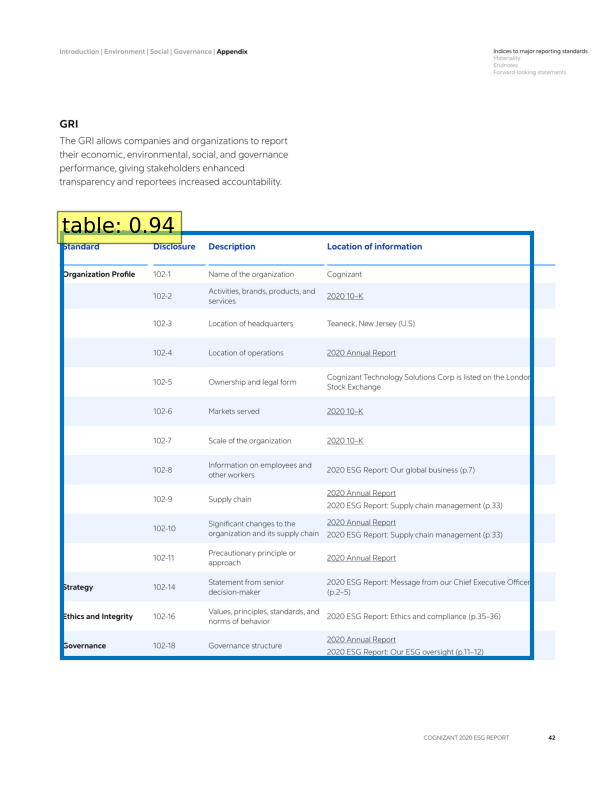

In [8]:
# Get the original width and height of the image
width, height = image.size

# Post-process the object detection outputs using the feature extractor
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

# Plot the visualization of the results
plot_results(image, results['scores'], results['labels'], results['boxes'])

In [9]:
# Use the feature extractor to encode the resized image
encoding = feature_extractor(image, return_tensors="pt")

# Get the keys of the encoding dictionary
keys = encoding.keys()
keys

dict_keys(['pixel_values', 'pixel_mask'])

In [10]:
# Import the TableTransformerForObjectDetection class from the transformers library
from transformers import TableTransformerForObjectDetection

# Load the pre-trained Table Transformer model for table structure recognition
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

with torch.no_grad():
  outputs = model(**encoding)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


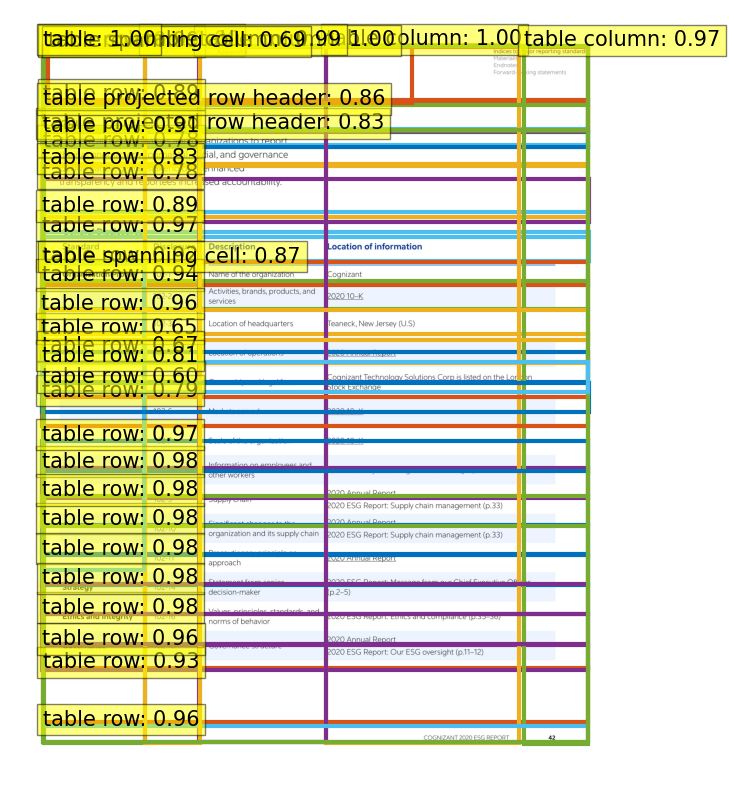

In [11]:
# Create a list of target sizes for post-processing
# 'image.size[::-1]' swaps the width and height to match the target size format (height, width)
target_sizes = [image.size[::-1]]

# Post-process the object detection outputs using the feature extractor
# Use a threshold of 0.6 for confidence
results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]

# Plot the visualization of the results
plot_results(image, results['scores'], results['labels'], results['boxes'])

# Inference pipeline

In [12]:
from PIL import Image, UnidentifiedImageError
import torch
import matplotlib.pyplot as plt
from transformers import DetrFeatureExtractor, TableTransformerForObjectDetection

class BorderlessTableDetection:
    def __init__(self, image_path, output_path, detection_model="microsoft/table-transformer-detection",
                 structure_model="microsoft/table-transformer-structure-recognition"):
        """
        Initializes the BorderlessTableDetection class with models, feature extractor, and image paths.
        
        @param image_path: The path of the image to process.
        @param output_path: The path to save the output image.
        @param detection_model: Pre-trained model to detect tables.
        @param structure_model: Pre-trained model to recognize the structure of tables.
        """
        self.image_path = image_path
        self.output_path = output_path
        try:
            self.feature_extractor = DetrFeatureExtractor()
            self.detection_model = TableTransformerForObjectDetection.from_pretrained(detection_model)
            self.structure_model = TableTransformerForObjectDetection.from_pretrained(structure_model)
        except Exception as e:
            print(f"Error loading models or feature extractor: {e}")
            raise
        
        self.image = None
        self.encoding = None

    def load_image(self):
        """
        Loads the image from the given path and resizes it.

        @return: None
        """
        try:
            self.image = Image.open(self.image_path).convert("RGB")
            width, height = self.image.size
            self.image = self.image.resize((int(width * 0.5), int(height * 0.5)))
        except FileNotFoundError:
            print(f"Error: The file {self.image_path} was not found.")
            raise
        except UnidentifiedImageError:
            print(f"Error: Unable to identify the image file at {self.image_path}.")
            raise
        except Exception as e:
            print(f"Unexpected error while loading image: {e}")
            raise
    
    def extract_features(self):
        """
        Extracts the features of the image using the DetrFeatureExtractor.

        @return: None
        """
        try:
            self.encoding = self.feature_extractor(self.image, return_tensors="pt")
        except Exception as e:
            print(f"Error during feature extraction: {e}")
            raise
    
    def detect_tables(self, model_type="detection"):
        """
        Detects tables or table structures from the image using the appropriate model.

        @param model_type: Specifies whether to use the detection model or structure model. Defaults to "detection".
        @return: The output predictions from the model.
        """
        model = self.detection_model if model_type == "detection" else self.structure_model
        try:
            with torch.no_grad():
                outputs = model(**self.encoding)
            return outputs
        except Exception as e:
            print(f"Error during table detection: {e}")
            raise

    def post_process(self, outputs, threshold=0.7):
        """
        Post-processes the model outputs to apply a confidence threshold.

        @param outputs: The raw outputs from the model.
        @param threshold: The confidence threshold for filtering results. Defaults to 0.7.
        @return: Processed results containing scores, labels, and bounding boxes.
        """
        try:
            width, height = self.image.size
            results = self.feature_extractor.post_process_object_detection(outputs, threshold=threshold, 
                                                                          target_sizes=[(height, width)])[0]
            return results
        except Exception as e:
            print(f"Error during post-processing: {e}")
            raise

    def plot_results(self, results, scores, labels, boxes, model_type="detection"):
        """
        Plots the detected tables on the image and saves the result.

        @param results: The processed results from the model, including scores, labels, and bounding boxes.
        @param scores: Confidence scores for the detected tables.
        @param labels: Labels for the detected tables.
        @param boxes: Bounding boxes for the detected tables.
        @param model_type: Specifies which model's labels are being used (detection or structure). Defaults to "detection".
        @return: None
        """
        try:
            COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
                      [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]
            
            plt.figure(figsize=(16, 10))
            plt.imshow(self.image)
            ax = plt.gca()
            colors = COLORS * 100

            model = self.detection_model if model_type == "detection" else self.structure_model

            for score, label, (xmin, ymin, xmax, ymax), c in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
                ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=c, linewidth=3))
                try:
                    text = f'{model.config.id2label[label]}: {score:0.2f}'
                except KeyError:
                    text = f'Unknown Label: {score:0.2f}'
                ax.text(xmin, ymin, text, fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))
            
            plt.axis('off')
            plt.savefig(self.output_path, dpi=1000)
            plt.show()
        except Exception as e:
            print(f"Error during plotting or saving the results: {e}")
            raise

    def process_image(self, model_type="detection", threshold=0.7):
        """
        The main function that loads the image, processes it, detects tables, and plots the results.

        @param model_type: Specifies whether to use the detection model or structure model. Defaults to "detection".
        @param threshold: The confidence threshold for filtering results. Defaults to 0.7.
        @return: None
        """
        try:
            self.load_image()
            self.extract_features()
            outputs = self.detect_tables(model_type)
            results = self.post_process(outputs, threshold=threshold)
            self.plot_results(results, results['scores'], results['labels'], results['boxes'], model_type)
        except Exception as e:
            print(f"Error during image processing: {e}")
            raise



In [13]:
image_path = "/kaggle/input/borderless/borderless.jpg"

/opt/conda/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint

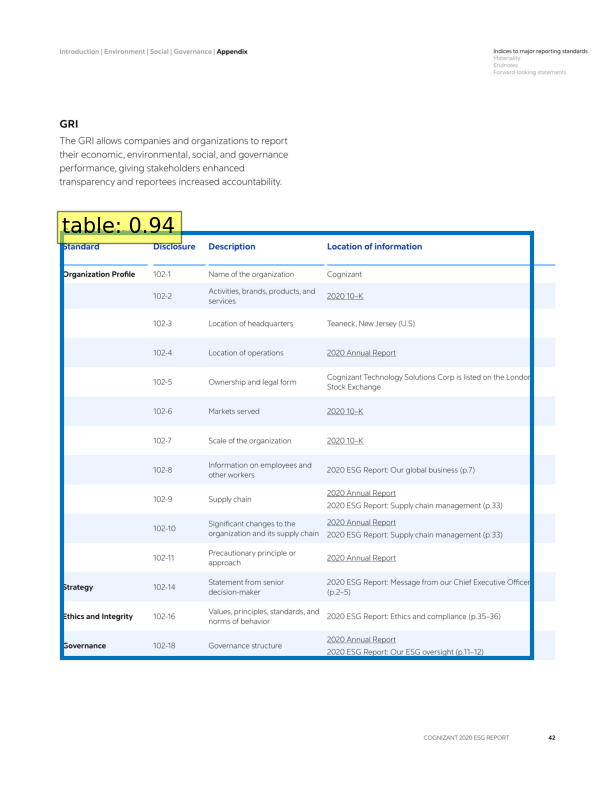

In [14]:
# Example usage:
detector = BorderlessTableDetection(image_path, "output.png")
detector.process_image(model_type="detection", threshold=0.7)

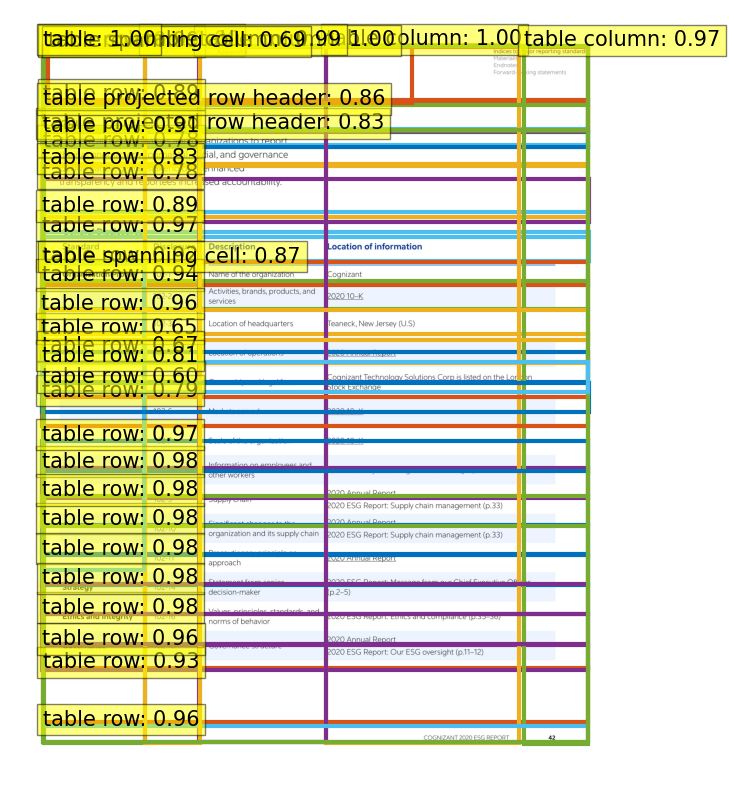

In [15]:
detector.process_image(model_type="structure", threshold=0.6)